In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import warnings 
warnings.simplefilter("ignore")

In [12]:
df=pd.read_csv("../data/HotelReservations.csv")


In [13]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [14]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [15]:
df.drop(columns=['Booking_ID'],inplace=True)

In [16]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [17]:
df.shape

(36275, 18)

In [19]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(10275)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(26000, 18)

In [24]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    18558
Canceled         7442
Name: count, dtype: int64

In [25]:
cat_cols=['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [26]:
data=df.copy()

In [27]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Univariate Analysis

In [39]:
def num_plot_dist(df,num_features):
    fig,axes=plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if(len(num_features)==1):
        axes=[axes]

    for i,column in enumerate(num_features):
        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True,palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="Blues")
        axes[i][1].set_title(f"Box plot for {column}")

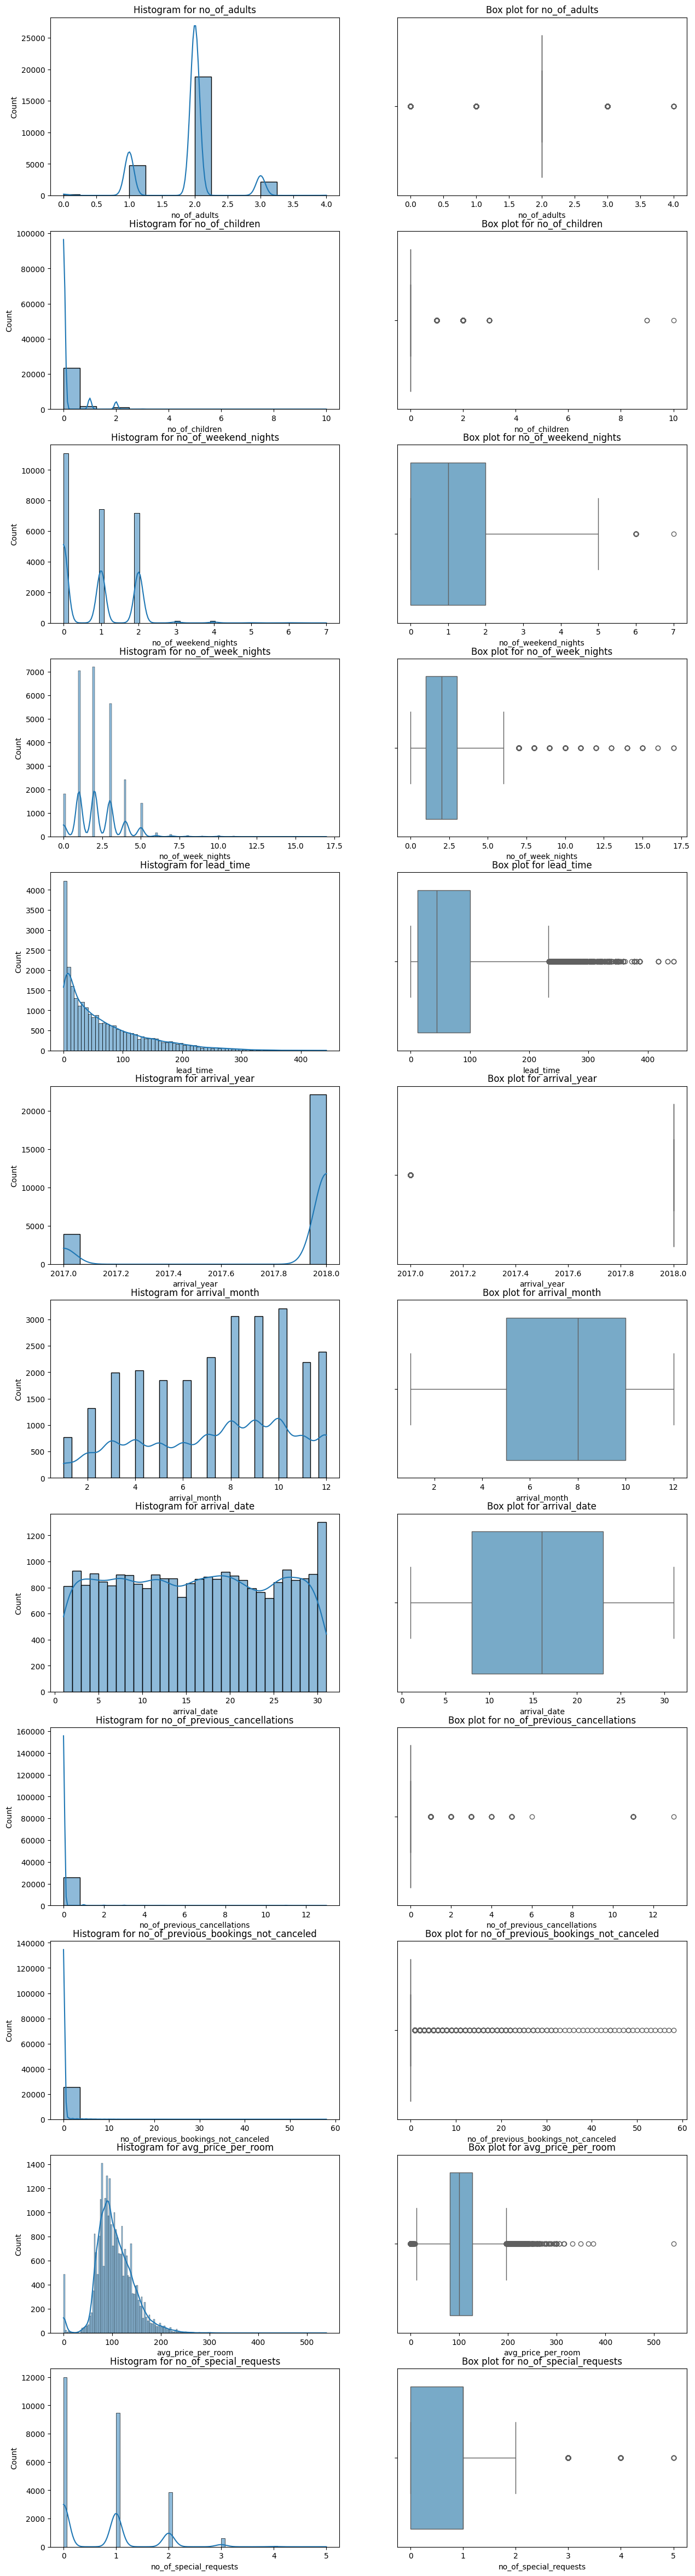

In [40]:
num_plot_dist(data,num_cols)

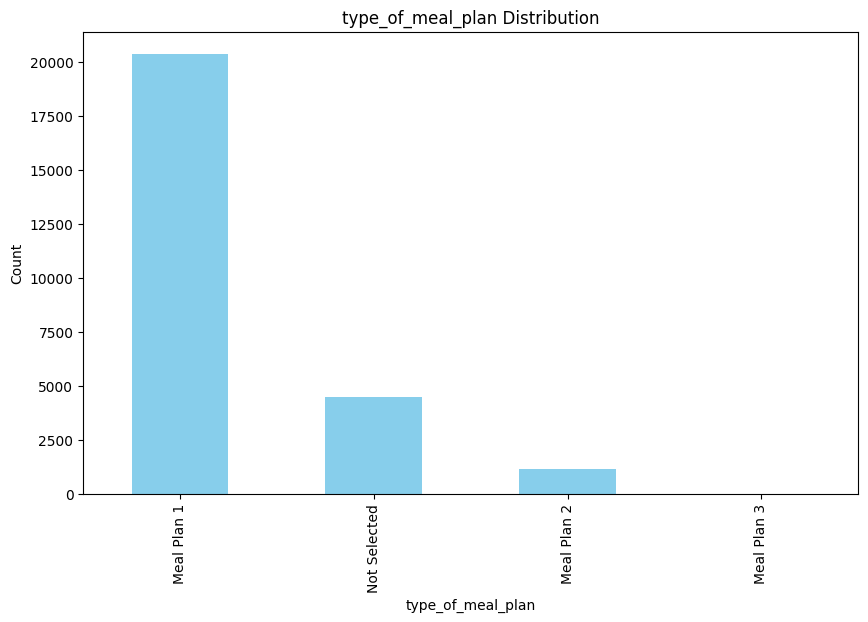

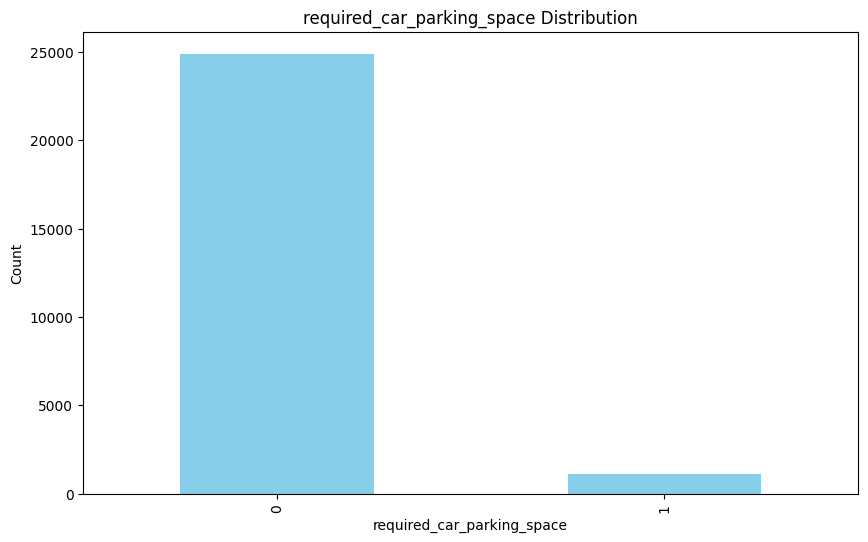

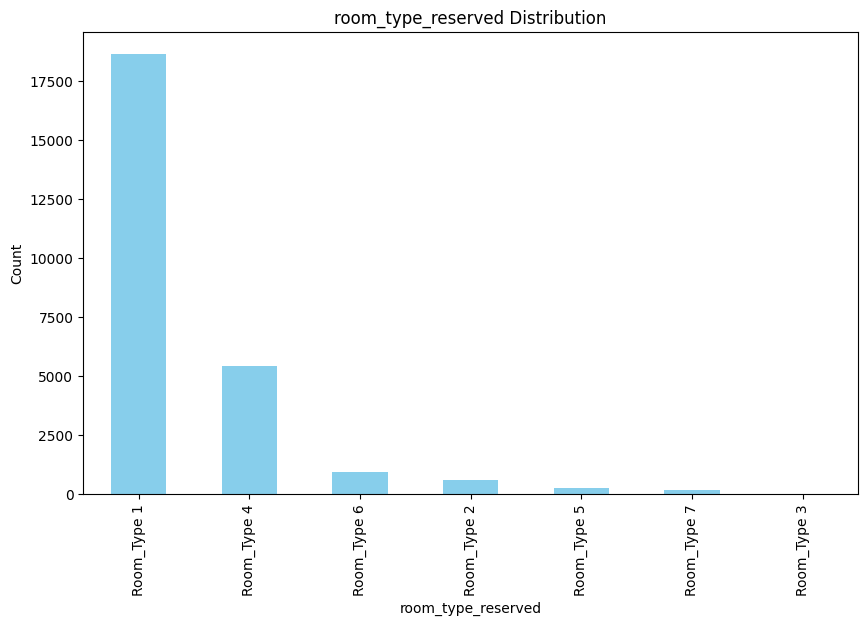

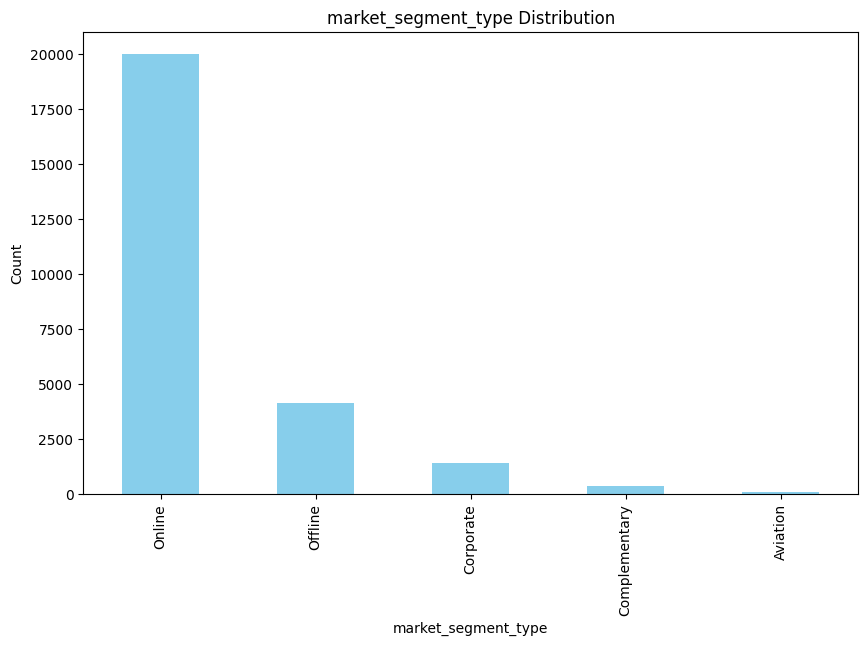

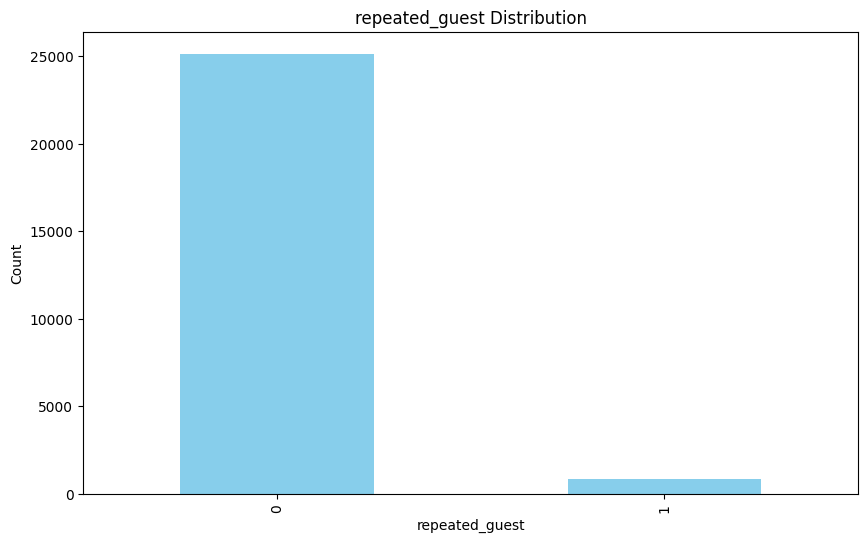

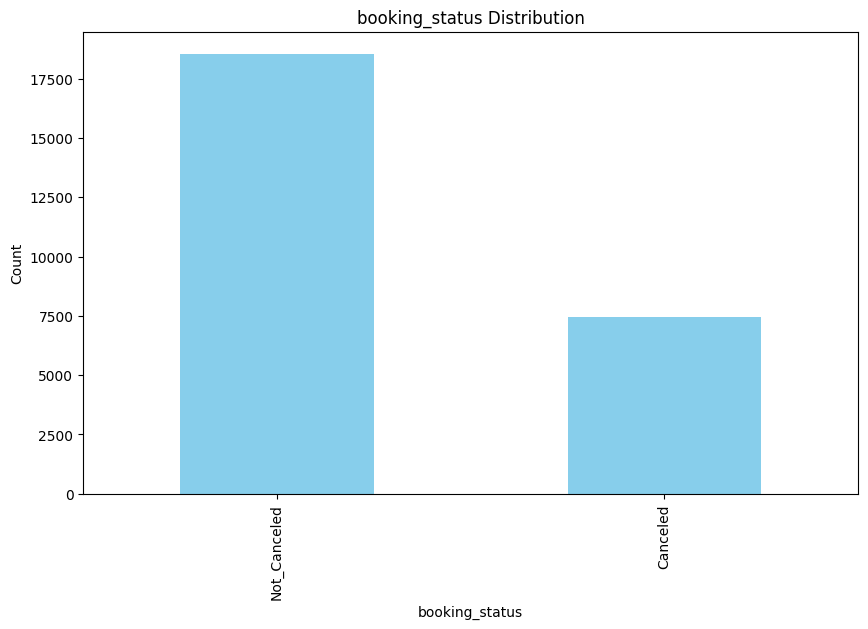

In [41]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

### Bivariate Analysis

In [42]:
def plot_bivariate_num(df,target,num_features):
    num_plots=len(num_features)
    num_rows=(num_plots+1)//2

    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()

    for i,column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i],data=df,palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()

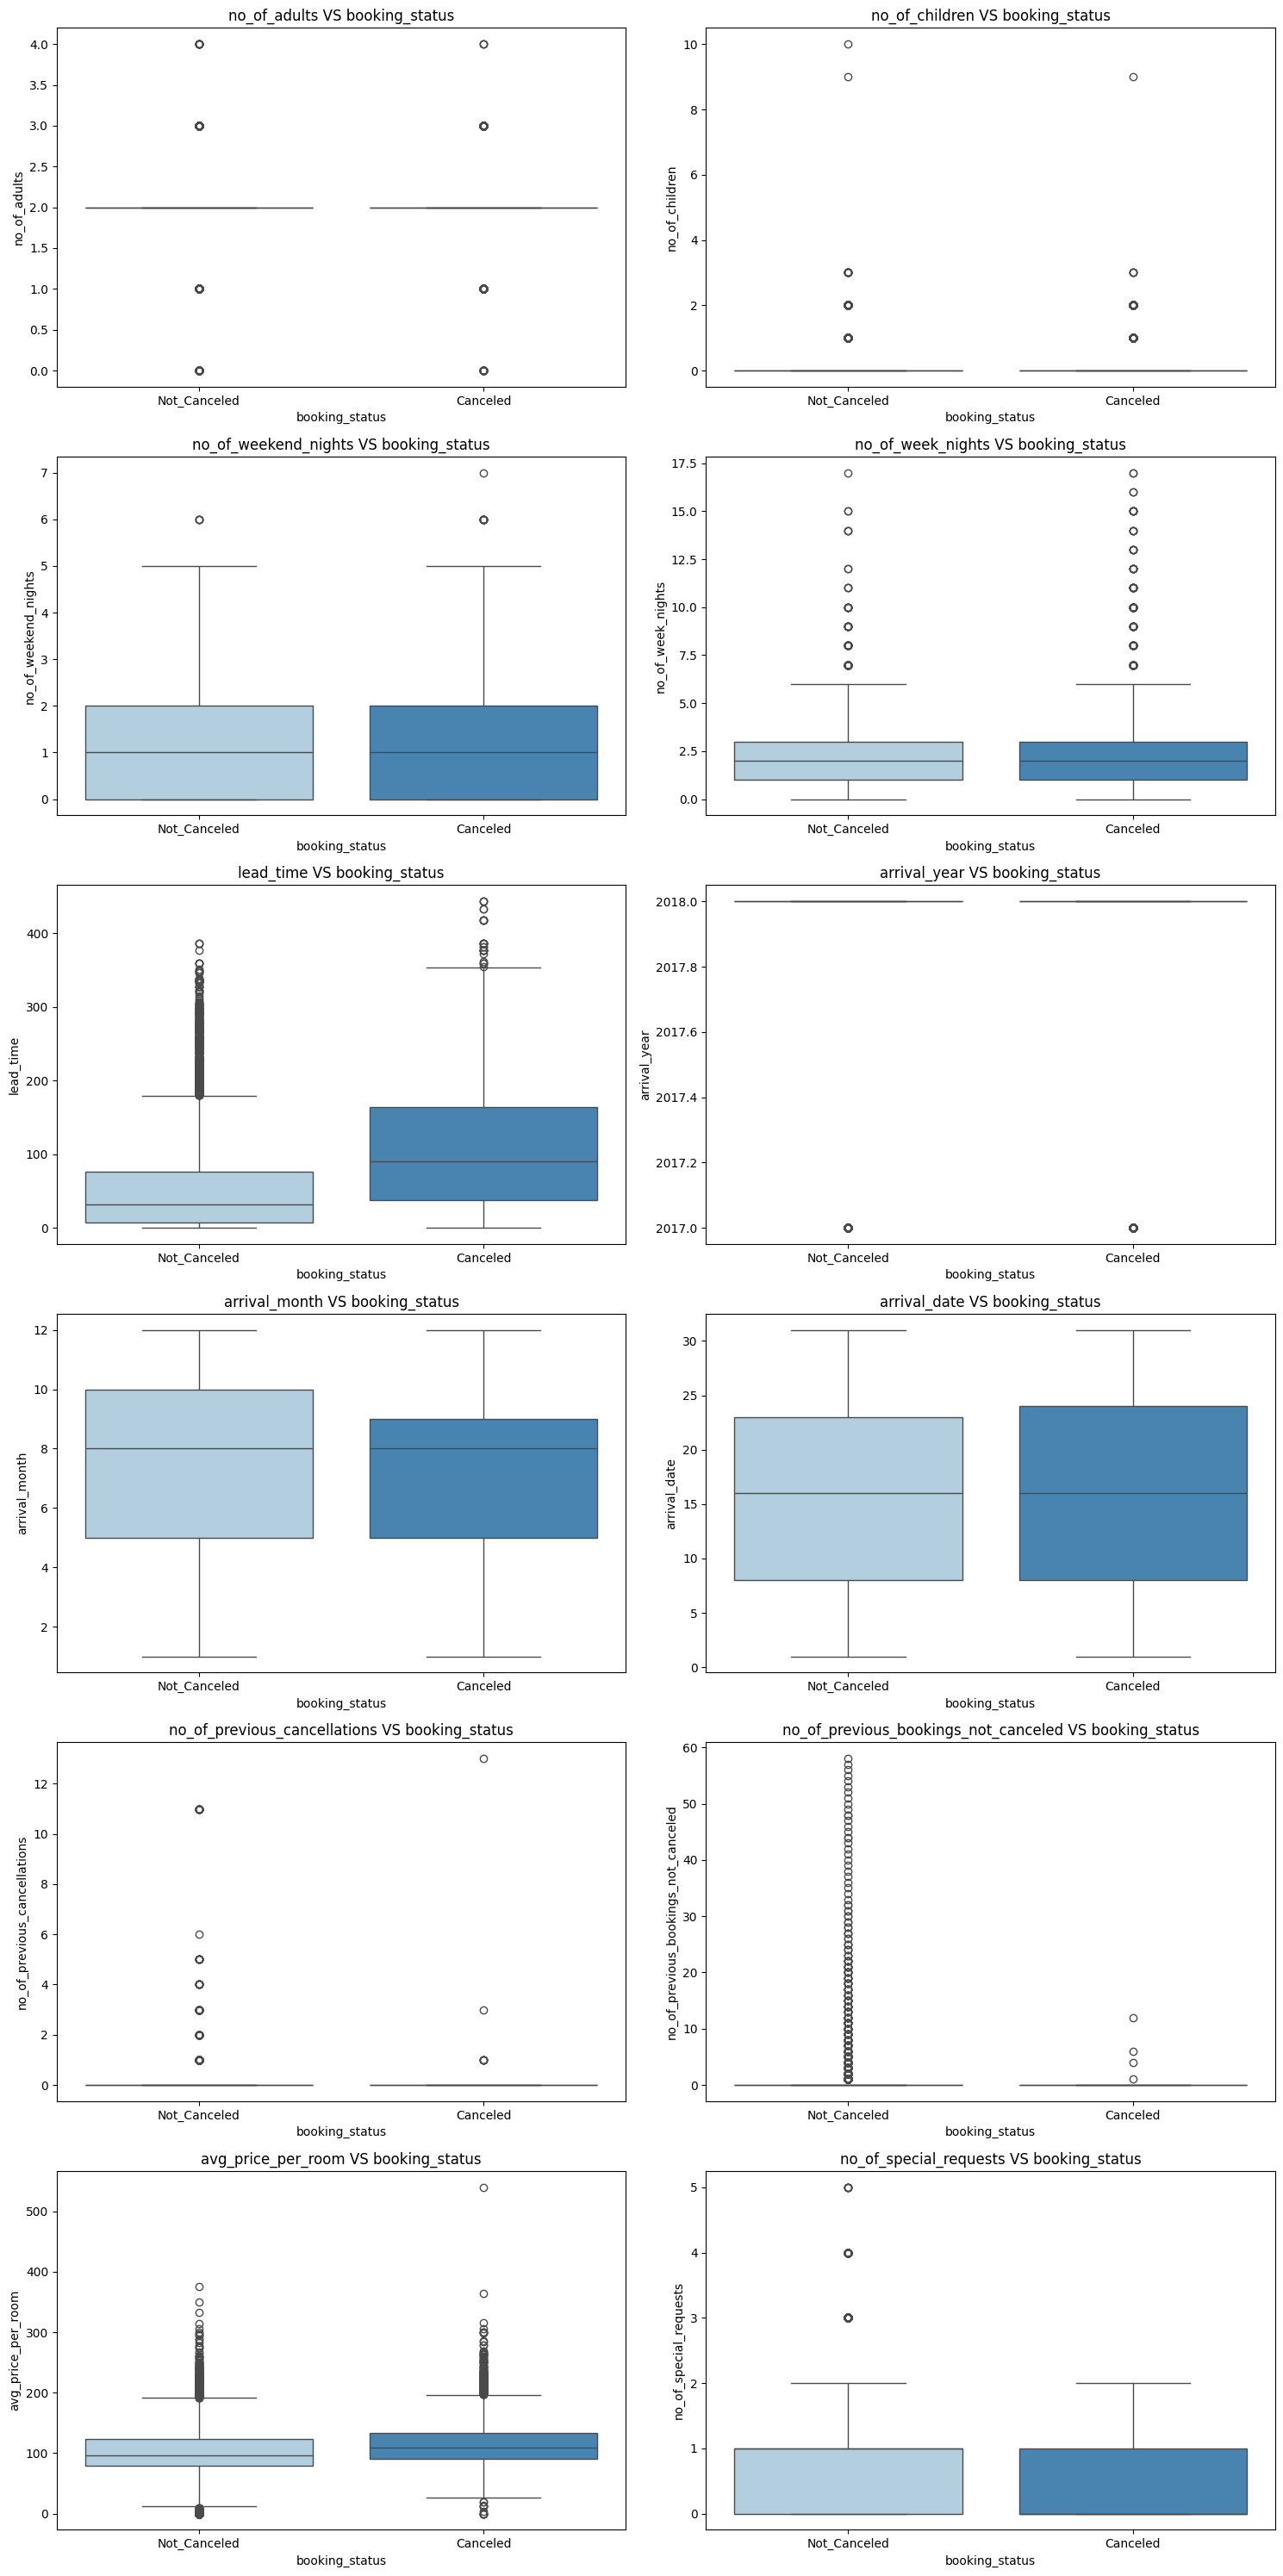

In [43]:
plot_bivariate_num(data,'booking_status',num_cols)

In [44]:
def plot_bivariate_cat(df,target,cat_features):
    num_features=len(cat_features)
    num_rows=(num_features+1)//2

    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature,hue=target,data=df,palette="Set2",ax=axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x',rotation=90)
    plt.tight_layout()
    plt.show()


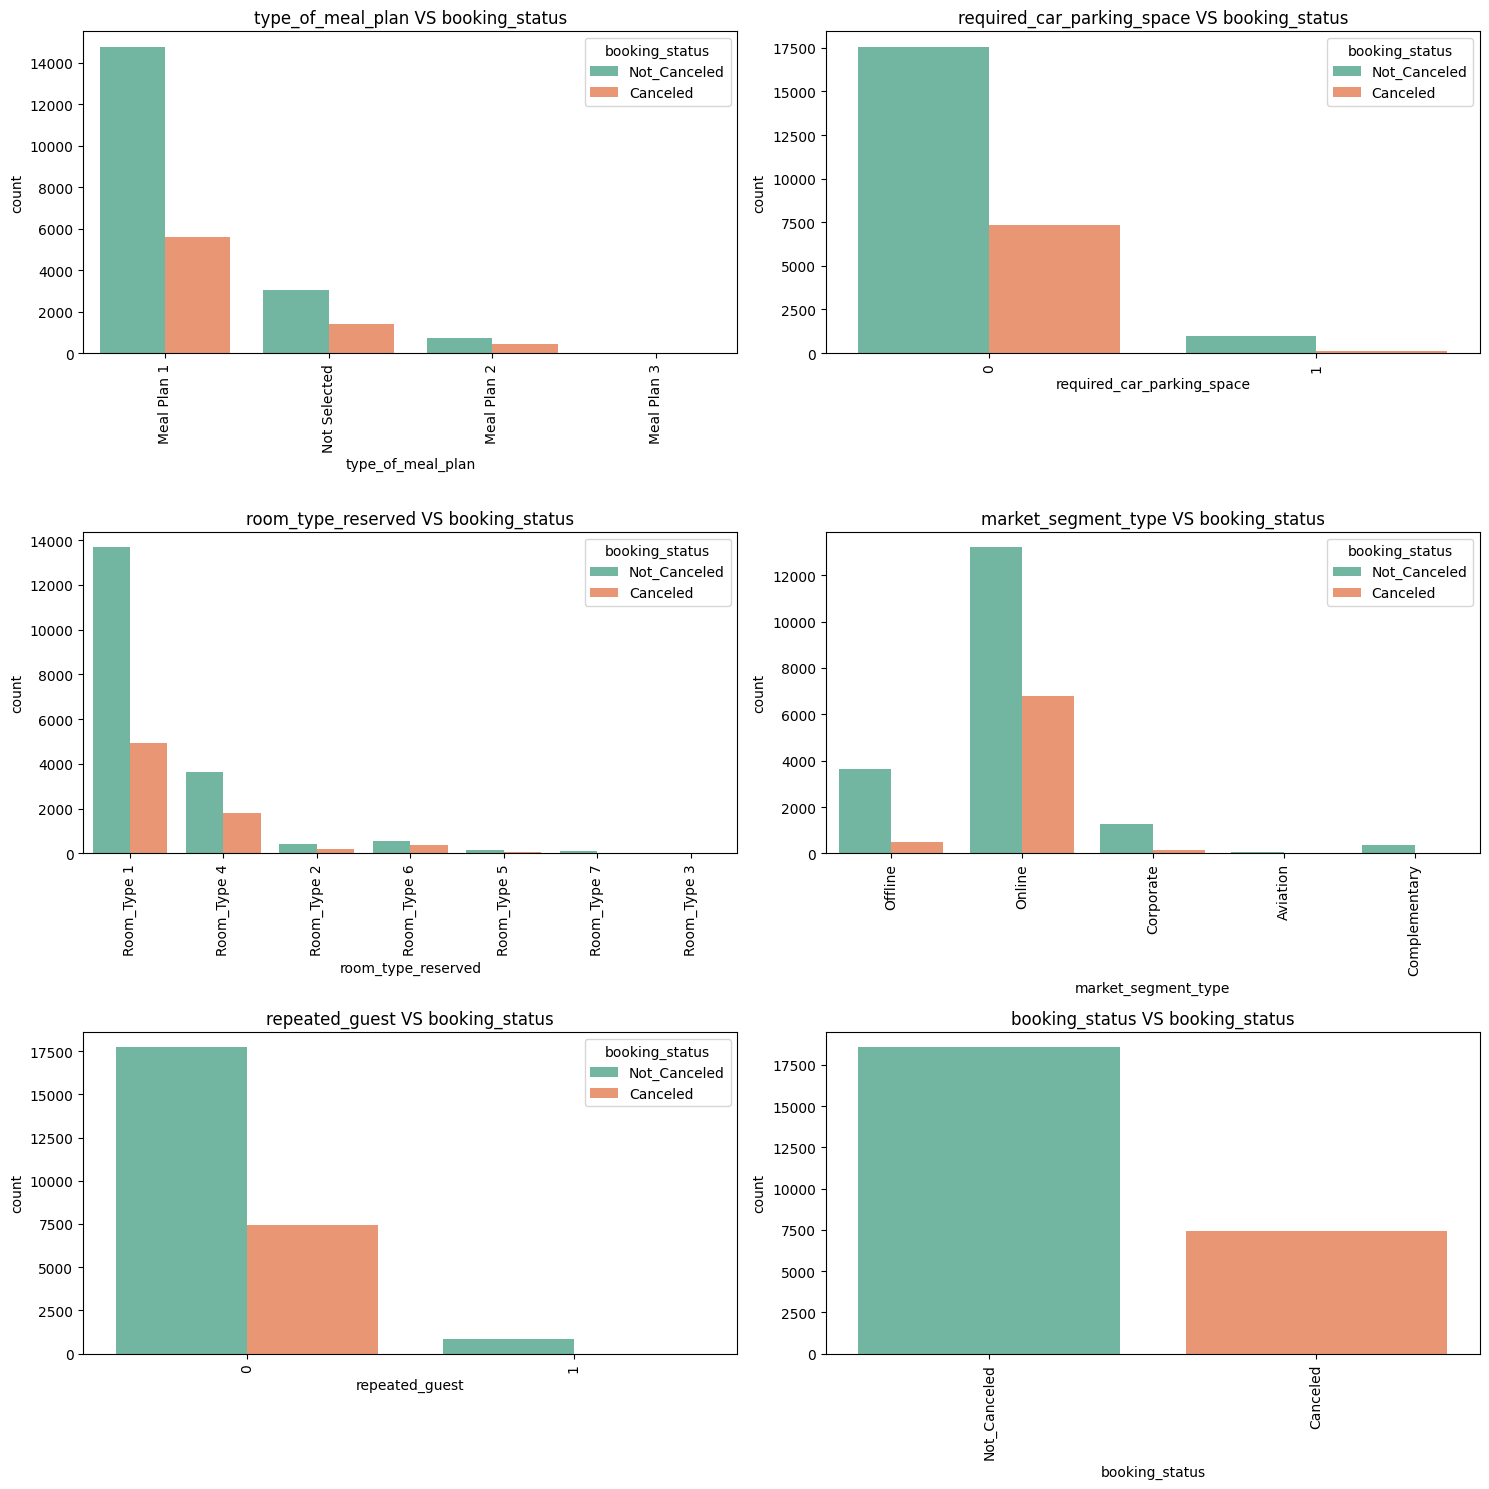

In [45]:
plot_bivariate_cat(data,'booking_status',cat_cols)

In [46]:
from sklearn.preprocessing import LabelEncoder


In [47]:
label_encoder=LabelEncoder()
mappings={}

for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])
    mappings[col]={label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}

In [48]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [49]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [53]:
X=add_constant(df)
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [54]:
vif_data

,feature,VIF
0,const,4.129913e+07
1,no_of_adults,1.337855e+00
2,no_of_children,1.284896e+00
3,no_of_weekend_nights,1.077614e+00
4,no_of_week_nights,1.131223e+00
5,type_of_meal_plan,1.177405e+00
6,required_car_parking_space,1.032967e+00
7,room_type_reserved,1.555871e+00
8,lead_time,1.411162e+00
9,arrival_year,1.291251e+00


In [55]:
corr=df.corr()

<Axes: >

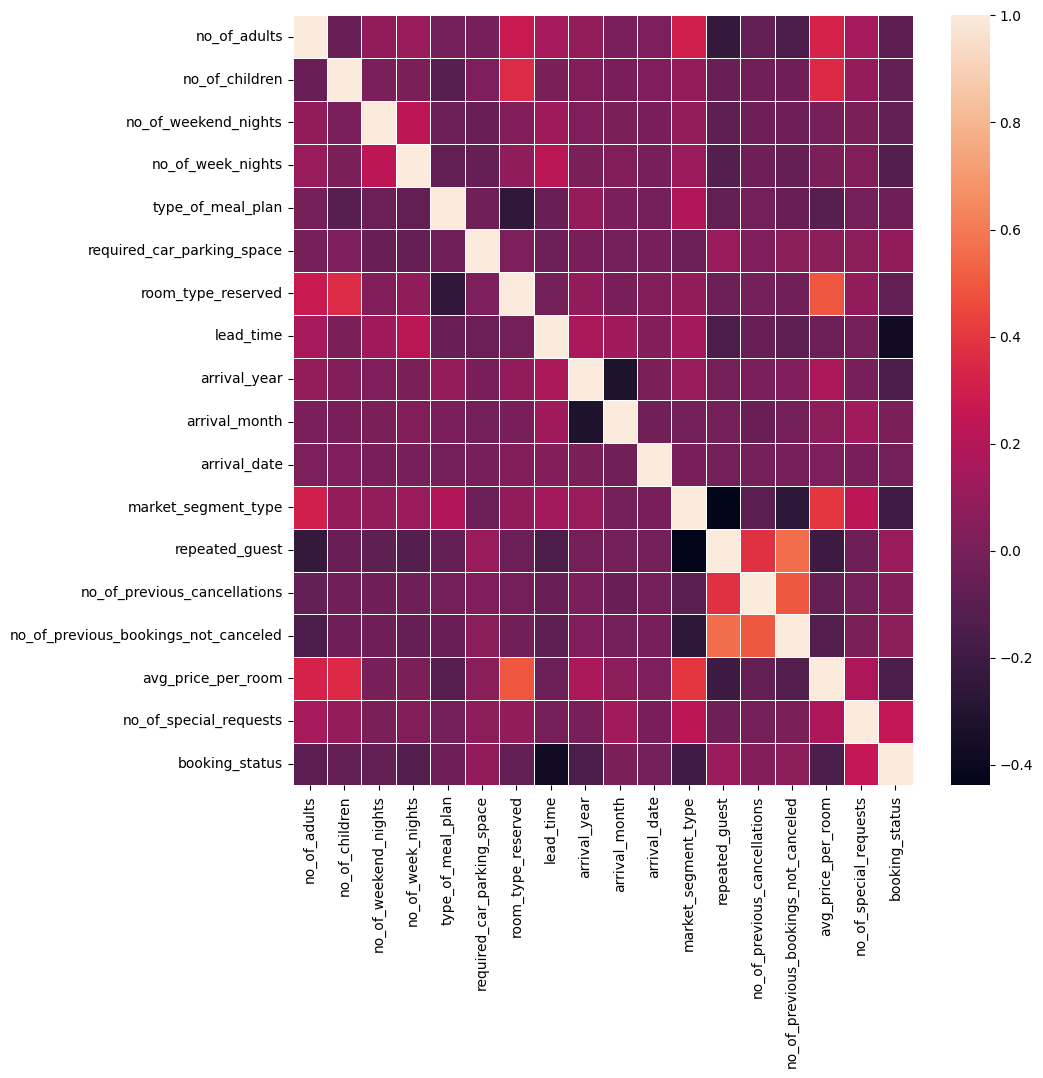

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,linewidths=0.5)

In [62]:
skewness=df.skew()

In [63]:
skewness

no_of_adults                            -0.297021
no_of_children                           4.005672
no_of_weekend_nights                     0.659718
no_of_week_nights                        1.601870
type_of_meal_plan                        1.638645
required_car_parking_space               4.559677
room_type_reserved                       1.373156
lead_time                                1.407857
arrival_year                            -1.963466
arrival_month                           -0.292238
arrival_date                             0.012177
market_segment_type                     -2.382309
repeated_guest                           5.249142
no_of_previous_cancellations            13.260942
no_of_previous_bookings_not_canceled     7.537942
avg_price_per_room                       0.588413
no_of_special_requests                   0.911121
booking_status                          -0.945939
dtype: float64

In [59]:
for col in df.columns:
    if skewness[col] > 5:
        df[col]=np.log1p(df[col])

In [65]:
df["booking_status"].value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [66]:
X=df.drop(columns='booking_status')
y=df["booking_status"]

In [67]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [70]:
from imblearn.over_sampling import SMOTE


In [71]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)

In [73]:
y_res.value_counts()

booking_status
1    18558
0    18558
Name: count, dtype: int64

In [74]:
balanced_df=pd.DataFrame(X_res,columns=X.columns)
balanced_df["booking_status"]=y_res

In [75]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0.0,0.0,0.0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0.0,0.0,0.0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0.0,0.0,0.0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0.0,0.0,0.0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0.0,0.0,0.0,94.50,0,0


In [76]:
balanced_df.shape

(37116, 18)

In [77]:
df=balanced_df.copy()

In [78]:
df.shape

(37116, 18)

In [79]:
len(df.columns)

18

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
X=df.drop(columns=['booking_status'])
y=df["booking_status"]

In [83]:
model=RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [84]:
feature_importance=model.feature_importances_

In [86]:
feature_importance

array([0.01819556, 0.00694659, 0.02893606, 0.04494181, 0.02012344,
       0.01195549, 0.01883946, 0.26439041, 0.01700161, 0.08590698,
       0.08373543, 0.06061061, 0.00619733, 0.00034847, 0.00306716,
       0.14805585, 0.18074773])

In [87]:
feature_importance_df=pd.DataFrame({
    'features':X.columns,
    'importance':feature_importance
})

In [88]:
feature_importance_df

,features,importance
0,no_of_adults,0.018196
1,no_of_children,0.006947
2,no_of_weekend_nights,0.028936
3,no_of_week_nights,0.044942
4,type_of_meal_plan,0.020123
5,required_car_parking_space,0.011955
6,room_type_reserved,0.018839
7,lead_time,0.264390
8,arrival_year,0.017002
9,arrival_month,0.085907


In [89]:
top_feature_importance=feature_importance_df.sort_values(by="importance",ascending=False)

In [90]:
top_10_features=top_feature_importance["features"].head(10).values
top_10_df=df[top_10_features.tolist() + ["booking_status"]]

In [91]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,224,0,65.00,10,2,3,2,1,0,0,1
1,5,1,106.68,11,6,4,3,2,3,0,1
2,1,0,60.00,2,28,4,1,2,0,0,0
3,211,0,100.00,5,20,4,2,0,0,0,0
4,48,0,94.50,4,11,4,1,1,3,0,0


In [92]:
df=top_10_df.copy()

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [98]:
X=df.drop(columns=['booking_status'])
y=df['booking_status']

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
classifiers={
    "Random Forest":RandomForestClassifier(random_state=42),
    "LogisticRegression":LogisticRegression(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "Support vector classifier":SVC(random_state=42),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "XGBoost":XGBClassifier(random_state=42),
    "Adaboost":AdaBoostClassifier(random_state=42),
    "LGBM":LGBMClassifier(random_state=42)
}

In [121]:
metrics={
    "Model":[],
    "Accuracy":[],
    "Precision":[],
    "Recall":[],
    "f1_score":[]
}

In [122]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["f1_score"].append(f1)



In [125]:
len(metrics["f1_score"])

10

In [123]:
metrics_df=pd.DataFrame(metrics)

In [124]:
metrics_df

,Model,Accuracy,Precision,Recall,f1_score
0,Random Forest,0.882947,0.876258,0.886139,0.881171
1,LogisticRegression,0.766164,0.784772,0.720022,0.751004
2,Gradient Boosting,0.827990,0.808527,0.850110,0.828797
3,Support vector classifier,0.729930,0.727857,0.716447,0.722107
4,Decision Tree,0.836207,0.841808,0.819582,0.830546
5,KNN,0.780577,0.839364,0.682618,0.752920
6,Naive Bayes,0.768050,0.783136,0.727998,0.754561
7,XGBoost,0.867457,0.859155,0.872387,0.865721
8,Adaboost,0.806304,0.799782,0.806381,0.803068
9,LGBM,0.855065,0.837553,0.873487,0.855143


In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [127]:
X=df.drop(columns=["booking_status"])
y=df["booking_status"]

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [129]:
rf=RandomForestClassifier(random_state=42)

In [130]:
params_dist={
    'n_estimators':randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True,False]
}

In [132]:
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'

)

In [133]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.5s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E761697750>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E75FD35CD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E761697110>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E75642C050>},
                   random_state=42, scoring='accuracy', verbose=2)

In [134]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [138]:
best_rf_model=random_search.best_estimator_

In [139]:
y_pred= best_rf_model.predict(X_test)

In [140]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [141]:
accuracy

0.8803879310344828

In [142]:
precision

0.8713513513513513

In [143]:
recall

0.8866886688668867

In [144]:
f1

0.8789531079607416

In [145]:
import joblib

In [146]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [147]:
loaded_model=joblib.load("random_forest.pkl")

In [148]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
12105,57,0,60.0,11,17,3,3,0,0,3


In [152]:
new_data=np.array([57,0,60.0,11,17,3,3,0,0,3]).reshape(1,-1)

In [153]:
predictions=loaded_model.predict(new_data)

In [155]:
predictions

array([1])